In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('mean-relative-humidity-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_air_temperature,mean_wind_speed,percentage_possible_sunshine,total_sunshine_duration,solar_radiation,mean_relative_humidity
0,Jan-10,75.5,-3.4,5.5,14,40.4,3.8,75
1,Feb-10,109.5,-4.9,4.1,17,48.8,6.2,74
2,Mar-10,100.5,-1.4,4.7,29,108.0,10.5,68
3,Apr-10,94.0,3.5,4.3,36,146.2,13.9,77
4,May-10,76.5,7.3,4.9,37,168.6,16.5,86


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.7922595356036503


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[68.49740937 73.34776772 73.41439381 76.21272234 78.49683308 84.16935876
 91.02568198 82.53972118 73.73767352 67.78883874 69.05499017 69.47453791
 67.89382836 70.26272849 71.48991637 76.4018043  80.08502303 88.28790534
 87.63071438 80.72904692 75.90432648 67.52604369 66.85361946 69.89135522
 69.15951852 69.42787256 70.86083803 73.42892548 81.9859022  81.44243729
 87.71913203 83.70617956 78.10313771 69.97253196 70.62552037 70.41891806
 68.60845127 70.84979736 72.59138373 75.48214535 81.83574564 83.84162806
 83.84859042 83.69332004 75.58099655 68.31164659 69.7670078  68.39224396
 69.15997651 67.46342183 66.90648469 71.78037442 81.33378274 85.25090413
 85.36971013 83.23155857 77.10945389 67.03728484 65.42976151 69.73293464
 67.36307537 68.1482697  71.84675345 73.75001001 79.31037037 86.05547545
 87.3264348  83.28221654 75.47058624 69.30149279 66.21765313 68.00709085
 70.731414   73.41930944 71.28886524 75.39529108 74.25863669 84.35613518
 85.66949395 81.59882545 77.59

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 2.5129014230666153
Mean Squared Error: 11.766059242880782
Root Mean Squared Error: 3.430168981680171


Text(0.5, 1.0, 'Mean relative humidity - actual and predicted values')

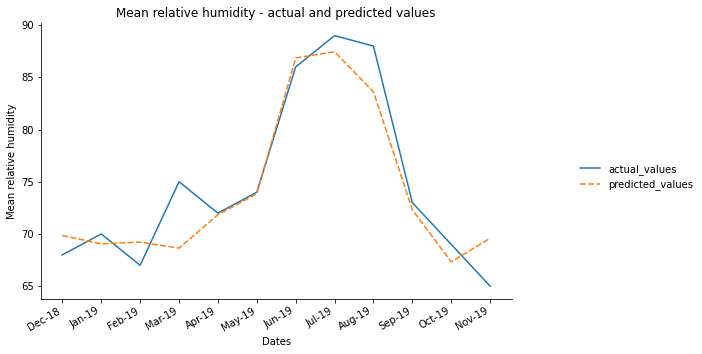

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Mean relative humidity') #set the label for the y-axis
plt.title('Mean relative humidity - actual and predicted values') #set the title of the graph